Numerov Method
=========================


### Atomic units

$$ m = \hbar = e = 1 
\,, \qquad 
4\pi\varepsilon_0 = 1
\,, \qquad 
a_0 = \frac{4\pi \epsilon_0 \hbar^2}{m e^2} = 1
$$


### Radial equation for hydrogen atom

$$
-\frac12 \frac{d^2 u(r)}{dr^2}  + V(r)\, u(r) = E \, u(r)
\ \ \ \ \ \ \ \ V(r) = \left( - \frac{1}{r} +  \frac{l(l+1)}{2 r^2}\right)
$$

## Matrix approach

Suitable for discrete spectrum. Gives many eigenvalues and eigenfunctions in one shot

### Notation

See lecture notes

$$
\left(-\frac{1}{2} B^{-1} A + V \right) u = E \, u
$$

$$
A_{ij} = \frac{1}{\Delta r^2} \left( \delta_{i+1,j}  -2 \, \delta_{i,j} + \delta_{i-1,j} \right)
\, \ \ \ \ 
B_{ij} = \frac{1}{12} \left( \delta_{i+1,j} + 10 \, \delta_{i,j} + \delta_{i-1,j} \right)
\, \ \ \ \ 
V = \mathrm{diag}(V_0, V_1, \dots, V_{N-1})
$$

In [39]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [40]:
def mat_sandwich(n,diag_val):
    mat = diag_val * np.eye(n) 
    mat += np.eye(n,k=1)
    mat += np.eye(n,k=-1)
    return mat

In [41]:
# s in atomic units ( Bohr radius is a0 = 5.29177⋅10−11m )
l = 1
def V(s):
    return -1/s + l*(l+1)/(2 * s**2)

In [42]:
dr = 0.05
npt = 1005

rgrid = np.arange(1,npt+1) * dr

B = mat_sandwich(npt,10)/12
Binv = np.linalg.inv(B)

A = mat_sandwich(npt,-2)/(dr**2)

KE = - Binv @ A / 2

H = KE + np.diag(V(rgrid))

In [43]:
w, v = np.linalg.eigh(H) # solve eigensystem

In [44]:
# Compare first few eigenvalues with exact solution
print(w[0:6])
print([-1/(2*n**2) for n in range(l+1,6+l+1)])

[-0.12500037 -0.05555568 -0.03121948 -0.01825947 -0.00361426  0.01597395]
[-0.125, -0.05555555555555555, -0.03125, -0.02, -0.013888888888888888, -0.01020408163265306]


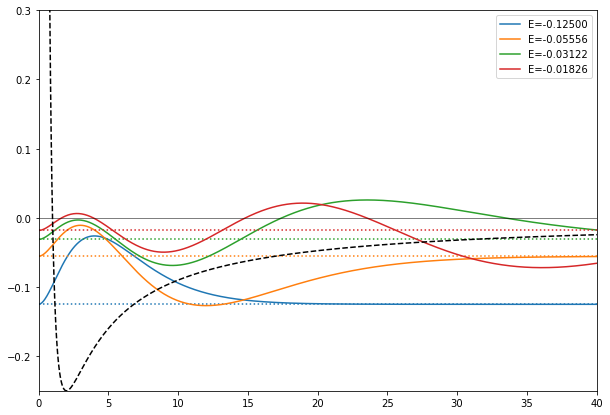

In [45]:
plt.figure(figsize=(10,7))

for n in range(0,4):
    ln, = plt.plot(rgrid, w[n]*np.ones(len(rgrid)),ls='dotted')
    plt.plot(rgrid, w[n] + np.sign(v[0,n]) * v[:,n], color=ln.get_color(), label='E='+'{:.5f}'.format(w[n]))
plt.plot(rgrid,V(rgrid),color='black',ls='dashed')
plt.xlim(0,40)
plt.ylim(2*w[0], 0.3)
plt.axhline(0,color='black',lw=0.5)
plt.legend()
plt.show()

### Shooting approach

Suitable for both continuous and discrete specturm, but needs more (programming) work (e.g. bisection routine) to find the discrete eigenvalues. Moreover one should pay attention to the identification of the energy levels (is the solution the ground state? Are there more solutions in the considered energy window?). Resolving (quasi-)degenerate energy levels might be tricky.

In [46]:
def numerov(u, V, E, dr):
    for n in range(1,len(u)-1):
        u[n+1] = u[n-1] - 2*u[n] - dr**2/6 * (10*(V[n]-E)*u[n] + (V[n-1]-E)*u[n-1])
        u[n+1] /= dr**2/6 * (V[n+1] - E) - 1
    return u

In [47]:
dr = 0.05
npt = 2005
rgrid = np.arange(1,npt+1) * dr - dr/10
u = np.zeros(npt)
u[1] = 1e-4

In [48]:
E = - 0.124995
u = numerov(u, V(rgrid), E, dr)

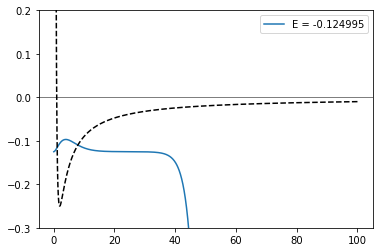

In [49]:
plt.plot(rgrid, E + u, label='E = '+str(E))
plt.plot(rgrid,V(rgrid),color='black',ls='dashed')
plt.ylim(-0.3,0.2)
plt.axhline(0,color='black',lw=0.5)
plt.legend()
plt.show()